# My Job Applications 2023

### Imports

In [285]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpld
from collections import Counter
from dateutil.relativedelta import relativedelta

## Applications

### Column Names

In [112]:
app_column_names = [
    'date_applied', 'job_title', 'job_cat', 'department',
    'location', 'recruiter', 'referral', 'method', 'url'
]
app_column_names

['date_applied',
 'job_title',
 'job_cat',
 'department',
 'location',
 'recruiter',
 'referral',
 'method',
 'url']

### Write Data

In [205]:
company_indexes = []

siemens_app = [
    np.datetime64('2022-11-19'), 'Testingenieur/in für Embedded Systems', 
    'QA Engineer', 'Siemens Energy', 'Berlin', None, None, 'linkedin', 
    'https://jobs.siemens-energy.com/en_US/jobs/Login'
]
company_indexes.append('Siemens')

spotify_app = [
    np.datetime64('2023-01-04'), 'Machine Learning Engineer', 'ML Engineer', 
    'Content Intelligence', 'Berlin/Remote', None, None, 'linkedin',
    'https://jobs.lever.co/spotify/f6399d24-74ff-406c-be20-ffdac88de4d0?lever-source=LinkedInJobs'
]
company_indexes.append('Spotify')

convex_app = [
    np.datetime64('2023-01-04'), 'Integrations Developer - C#/Python', 
    'Python Engineer', 'IT Management', 'Berlin', None, None, 'linkedin',
    'https://join.com/companies/convex-energy/6711604-integrations-developer-c-python-m-f-d?pid=731067c1dfecf6015bf5&oid=040cad5b-9c17-4c36-8fc4-e1390e7d46ed'
]
company_indexes.append('Convex_Energy')

bikemap_app = [
    np.datetime64('2023-01-04'), 'Backend Developer - Python', 'Backend Engineer', 
    None, 'Vienna', None, None, 'linkedin', 'https://bikemap.jobs.personio.com/job/415336?display=de'
]
company_indexes.append('Bikemap')

db_app = [
    np.datetime64('2023-01-04'), 'DevOps Engineer mit Fokus auf Data Science', 
    'DevOps Engineer', 'DB Systel', 'Berlin', None, None, 'linkedin',
    'https://karriere.deutschebahn.com/karriere-de/Suche/DevOps-Engineer-w-m-d-mit-Fokus-auf-Data-Science-9981626?jobId=194391', 
]
company_indexes.append('DB')

benz_app = [
    np.datetime64('2023-01-04'), 'Site Reliability Engineer for Hybrid Cloud Platform', 
    'Cloud Engineer', 'MBition', 'Berlin', None, None, 'linkedin',
    'https://mbition.io/jobs/?job=911357&apply=1&pid=e78ca23c-a06c-4c87-a70c-fcc7052e7ffa&it=Mz7a17-DxBfrsvGYFVyA5A'
]
company_indexes.append('Mercedes_Benz')

accenture_app = [
    np.datetime64('2023-01-04'), 'Trainee Data - AI/Big Data Analytics/Data Management', 
    'Data Analyst', None, 'Germany', None, 'Niamh', 'Accenture website',
    'https://www.accenture.com/us-en/careers/jobdetails?id=R00005249_de&title=Trainee+Data+(AI+%2f+Big+Data+Analytics+%2f+Data+Management)+(all+genders)'
]
company_indexes.append('Accenture')

focusrite_app = [
    np.datetime64('2023-01-07'), 'Junior QA Engineer - Audio Hardware & Firmware Testing', 
    'QA Engineer', 'ADAM Audio', 'Berlin', None, None, 'linkedin', 
    'https://apply.workable.com/focusrite/j/7291245450/'
]
company_indexes.append('Focusrite')

daedalic_app = [
    np.datetime64('2023-01-07'), 'Build Engineer', 'ML Engineer', None, 'Hamburg', 
    None, None, 'linkedin', 'http://jobs.daedalicsupport.com/index/build-engineer-(m/f/d).html'
]
company_indexes.append('Daedalic_Entertainment')

soundcloud_app = [
    np.datetime64('2023-01-11'), 'Machine Learning Engineer', 'ML Engineer', 
    'Search and Recommendations', 'Berlin', None, None, 'linkedin',
    'https://careers.soundcloud.com/job?gh_jid=6561571002&gh_src=b2264ac52us'
]
company_indexes.append('SoundCloud')

native_inst_app = [
    np.datetime64('2023-01-11'), 'Senior Software Engineer C++', 'C++ Engineer', 
    'Authoring Platforms Team', 'Berlin', None, None, 'linkedin',
    'https://www.native-instruments.com/en/career-center/career/6516976002'
]
company_indexes.append('Native_Instruments')

teufel_app = [
    np.datetime64('2023-01-11'), 'Backend Developer PHP/SPRYKER', 'Backend Engineer', 
    None, 'Berlin', None, None, 'linkedin',
    'https://lautsprecherteufel.jobs.personio.de/job/690114?_pc=75581#apply'
]
company_indexes.append('Teufel')

burmester_app = [
    np.datetime64('2023-01-13'), 'Automotive Audio Engineer', 'Audio Engineer', 
    None, 'Berlin', 'Sanda Firlay', None, 'linkedin',
    'https://jobapplication.hrworks.de/en/apply?companyId=o8ccafb&id=883dc0' 
]
company_indexes.append('Burmester_Audiosysteme')

### Build DataFrame

In [206]:
apps = [
    siemens_app, spotify_app, convex_app, bikemap_app, db_app, benz_app, 
    accenture_app, focusrite_app, daedalic_app, soundcloud_app, native_inst_app, 
    teufel_app, burmester_app
]

In [207]:
applications_df = pd.DataFrame(apps, index=company_indexes, columns=app_column_names)
applications_df.head(3)

,date_applied,job_title,job_cat,department,location,recruiter,referral,method,url
Siemens,2022-11-19,Testingenieur/in für Embedded Systems,QA Engineer,Siemens Energy,Berlin,None,None,linkedin,https://jobs.siemens-energy.com/en_US/jobs/Login
Spotify,2023-01-04,Machine Learning Engineer,ML Engineer,Content Intelligence,Berlin/Remote,None,None,linkedin,https://jobs.lever.co/spotify/f6399d24-74ff-40...
Convex_Energy,2023-01-04,Integrations Developer - C#/Python,Python Engineer,IT Management,Berlin,None,None,linkedin,https://join.com/companies/convex-energy/67116...


### First Responses

In [208]:
responses_cols = ['date_init_resp', 'initial_response', 'date_interview1', 
                  'interview_comments', 'next_steps', 'final_outcome']
responses_cols

['date_init_resp',
 'initial_response',
 'date_interview1',
 'interview_comments',
 'next_steps',
 'final_outcome']

#### Rejections

In [209]:
rejections_idx = []

db_fr = [np.datetime64('2023-01-09'), 'Rejected']
rejections_idx.append('DB')

accenture_fr = [np.datetime64('2023-01-11'), 'Rejected']
rejections_idx.append('Accenture')

bikemap_fr = [np.datetime64('2023-01-11'), 'Rejected']
rejections_idx.append('Bikemap')

teufel_fr = [np.datetime64('2023-01-19'), 'Rejected']
rejections_idx.append('Teufel')

In [210]:
rejections = [db_fr, accenture_fr, bikemap_fr, teufel_fr]

#### First Interviews

In [211]:
fi_idx = []

focusrite_fr = [
    np.datetime64('2023-01-17'), "Passed", '1.26.23', 
    'Interviewing with Andy Poole and Felix Beu'
]
fi_idx.append("Focusrite")

In [212]:
interviews = [focusrite_fr]

### DFs

In [213]:
fr_rej_df = pd.DataFrame(rejections, index=rejections_idx, columns=responses_cols[:2])
fr_rej_df

,date_init_resp,initial_response
DB,2023-01-09,Rejected
Accenture,2023-01-11,Rejected
Bikemap,2023-01-11,Rejected
Teufel,2023-01-19,Rejected


In [214]:
fr_pass_s = pd.DataFrame(interviews, index=fi_idx, columns=responses_cols[:4])
fr_pass_s

,date_init_resp,initial_response,date_interview1,interview_comments
Focusrite,2023-01-17,Passed,1.26.23,Interviewing with Andy Poole and Felix Beu


In [215]:
responses_df = pd.concat([fr_rej_df, fr_pass_s],)
responses_df

,date_init_resp,initial_response,date_interview1,interview_comments
DB,2023-01-09,Rejected,NaN,NaN
Accenture,2023-01-11,Rejected,NaN,NaN
Bikemap,2023-01-11,Rejected,NaN,NaN
Teufel,2023-01-19,Rejected,NaN,NaN
Focusrite,2023-01-17,Passed,1.26.23,Interviewing with Andy Poole and Felix Beu


## Big DF

In [216]:
jobs_df = applications_df.join(responses_df)
jobs_df

,date_applied,job_title,job_cat,department,location,recruiter,referral,method,url,date_init_resp,initial_response,date_interview1,interview_comments
Siemens,2022-11-19,Testingenieur/in für Embedded Systems,QA Engineer,Siemens Energy,Berlin,None,None,linkedin,https://jobs.siemens-energy.com/en_US/jobs/Login,NaT,NaN,NaN,NaN
Spotify,2023-01-04,Machine Learning Engineer,ML Engineer,Content Intelligence,Berlin/Remote,None,None,linkedin,https://jobs.lever.co/spotify/f6399d24-74ff-40...,NaT,NaN,NaN,NaN
Convex_Energy,2023-01-04,Integrations Developer - C#/Python,Python Engineer,IT Management,Berlin,None,None,linkedin,https://join.com/companies/convex-energy/67116...,NaT,NaN,NaN,NaN
Bikemap,2023-01-04,Backend Developer - Python,Backend Engineer,None,Vienna,None,None,linkedin,https://bikemap.jobs.personio.com/job/415336?d...,2023-01-11,Rejected,NaN,NaN
DB,2023-01-04,DevOps Engineer mit Fokus auf Data Science,DevOps Engineer,DB Systel,Berlin,None,None,linkedin,https://karriere.deutschebahn.com/karriere-de/...,2023-01-09,Rejected,NaN,NaN
Mercedes_Benz,2023-01-04,Site Reliability Engineer for Hybrid Cloud Pla...,Cloud Engineer,MBition,Berlin,None,None,linkedin,https://mbition.io/jobs/?job=911357&apply=1&pi...,NaT,NaN,NaN,NaN
Accenture,2023-01-04,Trainee Data - AI/Big Data Analytics/Data Mana...,Data Analyst,None,Germany,None,Niamh,Accenture website,https://www.accenture.com/us-en/careers/jobdet...,2023-01-11,Rejected,NaN,NaN
Focusrite,2023-01-07,Junior QA Engineer - Audio Hardware & Firmware...,QA Engineer,ADAM Audio,Berlin,None,None,linkedin,https://apply.workable.com/focusrite/j/7291245...,2023-01-17,Passed,1.26.23,Interviewing with Andy Poole and Felix Beu
Daedalic_Entertainment,2023-01-07,Build Engineer,ML Engineer,None,Hamburg,None,None,linkedin,http://jobs.daedalicsupport.com/index/build-en...,NaT,NaN,NaN,NaN
SoundCloud,2023-01-11,Machine Learning Engineer,ML Engineer,Search and Recommendations,Berlin,None,None,linkedin,https://careers.soundcloud.com/job?gh_jid=6561...,NaT,NaN,NaN,NaN


#### No Response

In [217]:
responses = ['No Response' if type(x) != str else x for x in jobs_df.initial_response]
jobs_df.loc[:, 'initial_response'] = responses

## Visualizations

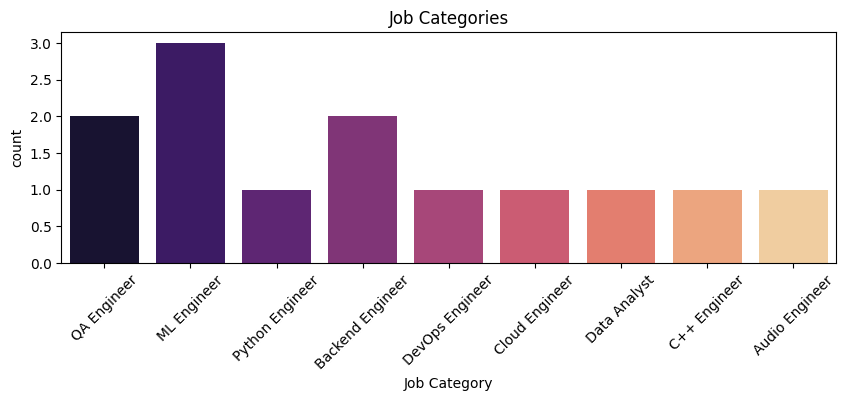

In [218]:
fig1, ax1 = plt.subplots(figsize=(10,3))
fig1 = sns.countplot(x=jobs_df.job_cat, palette='magma')
ax1.set_title('Job Categories')
ax1.set_xlabel('Job Category')
plt.xticks(rotation=45)
plt.show(fig1)

In [224]:
my_dates = np.unique(np.array([x.strftime('%Y-%m-%d') for x in jobs_df.date_applied], dtype='datetime64'))

In [225]:
date_grouped_df = jobs_df.loc[:, ['date_applied','initial_response']].groupby('date_applied')
grouped_keys = list(date_grouped_df.groups.keys())

date_reject_counts = []
for key in grouped_keys:
    date_reject_counts.append(Counter(date_grouped_df.get_group(key).initial_response))

In [226]:
no_response = []
for x in date_reject_counts:
    no_response.append(x['No Response'])
rejected = []
for x in date_reject_counts:
    rejected.append(x['Rejected'])
passed = []
for x in date_reject_counts:
    passed.append(x['Passed'])
both = np.array(rejected) + np.array(no_response)
width = 1

In [297]:
x_lines = pd.date_range(pd.to_datetime(my_dates[0]) - relativedelta(days=30), pd.to_datetime(my_dates[-1]) + relativedelta(days=30), freq='MS')
x_labes = [x.strftime('%b %-d') for x in x_lines]
x_labes

['Nov 1', 'Dec 1', 'Jan 1', 'Feb 1']

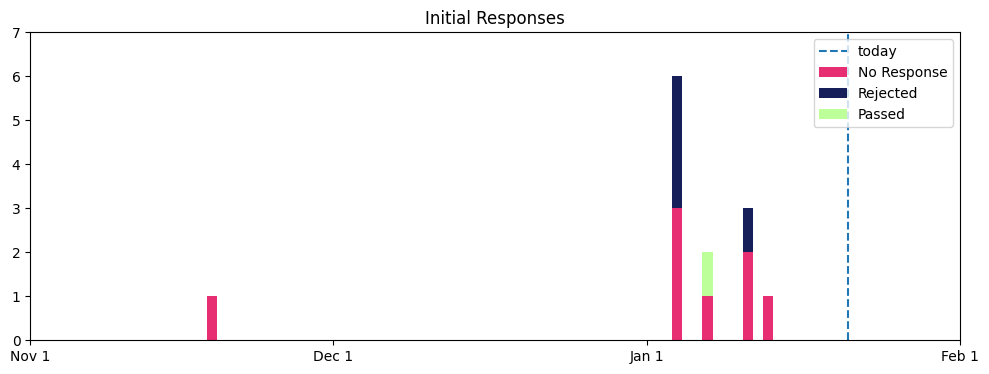

In [309]:
fig2, ax2 = plt.subplots(figsize=(12,4))

cat_palette = ['#e82e72', '#161f59', '#bdff99']

ax2.bar(my_dates, no_response, width, label='No Response', color=cat_palette[0])
ax2.bar(my_dates, rejected, width, bottom=no_response, label='Rejected', color=cat_palette[1])
ax2.bar(my_dates, passed, width, bottom=both, label='Passed', color=cat_palette[2])

l1 = ax2.vlines(datetime.today(), 0, 7, linestyles='dashed')
l1.set_label('today')

ax2.set_xticks(x_lines)
ax2.set_xticklabels(x_labes)
ax2.set_ybound(0, 7)
ax2.set_title('Initial Responses')
ax2.legend()

plt.show()